In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
plt.rcParams['figure.dpi'] = 180
sns.set_context('talk', font_scale= 1.2)

In [2]:
subsample_path = '/Users/bendalllab/Desktop/Maternal_cells'
counts_path = os.path.join(subsample_path, 'DCs_not_backgated_pdl1_cellengine.csv')
counts_df = pd.read_csv(counts_path)
counts_df.loc[:, ['cage', 'id','surgery_date']] = counts_df.loc[:, ['cage', 'id','surgery_date']].astype(str)

In [3]:
counts_df.head(5)

,fcsFileId,populationId,filename,population,uniquePopulationName,parentPopulation,parentPopulationId,channel,reagent,cage,challenge,day,id,organ,origin,surgery_date,timePI,median,eventCount
0,5fd149e6c356b30378ddbd57,5fe11012b5ba7007ac27f5f8,_102816 Cage 3576 15 E12.5 PB p4 24hr sal_PB_T...,DC,EV > Not_B_cells > Not_CD3 > CD68posOnly > Not...,MHCIIpos,5fe11012b5ba7007ac27f5ee,Ho165Di,PD-L1-bead4,3576,sal,E12.5,15,PB,maternal,_102816,24hr,NaN,0
1,5fd149e6c356b30378ddbd57,5fe11012b5ba7007ac27f678,_102816 Cage 3576 15 E12.5 PB p4 24hr sal_PB_T...,PDL1pos,EV > Not_B_cells > Not_CD3 > CD68posOnly > Not...,DC,5fe11012b5ba7007ac27f5f8,Ho165Di,PD-L1-bead4,3576,sal,E12.5,15,PB,maternal,_102816,24hr,NaN,0
2,5fd149e6c356b30378ddbd57,5fe1103ecd32aa0384caaeda,_102816 Cage 3576 15 E12.5 PB p4 24hr sal_PB_T...,DC,TIS > Not_B_cells > Not_CD3 > CD68posOnly > No...,MHCIIpos,5fe1103ecd32aa0384caaed8,Ho165Di,PD-L1-bead4,3576,sal,E12.5,15,PB,maternal,_102816,24hr,NaN,0
3,5fd149e6c356b30378ddbd57,5fe1103ecd32aa0384caaf02,_102816 Cage 3576 15 E12.5 PB p4 24hr sal_PB_T...,PDL1pos,TIS > Not_B_cells > Not_CD3 > CD68posOnly > No...,DC,5fe1103ecd32aa0384caaeda,Ho165Di,PD-L1-bead4,3576,sal,E12.5,15,PB,maternal,_102816,24hr,NaN,0
4,5fd14a1842055c036fc1fda0,5fe11012b5ba7007ac27f5f8,_82318 Cage 0428 14 E12.5 PL_M p1 2hr sal_Not ...,DC,EV > Not_B_cells > Not_CD3 > CD68posOnly > Not...,MHCIIpos,5fe11012b5ba7007ac27f5ee,Ho165Di,PD-L1-bead4,428,sal,E12.5,14,PL_M,maternal,_82318,2hr,0.746196,177


In [4]:
red_counts_df = counts_df.loc[:, ['filename','population', 'uniquePopulationName', 'cage', 'challenge', 'day', 'id', 'organ',
       'origin', 'surgery_date', 'timePI', 'reagent','median','eventCount']].set_index('filename')
locations = red_counts_df['uniquePopulationName'].str.split('>',n = 1, expand = True)
new_counts = pd.concat([red_counts_df, locations[0]], axis=1)
new_counts.drop(columns = ['uniquePopulationName'], inplace = True)
new_counts.rename(columns = {0: 'location'}, inplace = True)

In [5]:
new_counts['year'] = new_counts['surgery_date'].str.strip().str[-1]
year_dict = {'6': '2016','7': '2017', '8': '2018', '9': '2019'}
new_counts['batch_run'] = new_counts['year'].map(year_dict)
new_counts.drop(columns = 'year', inplace = True)
PB_mask = (new_counts['batch_run'].isin(['2016', '2017']) & (new_counts['organ'] == 'PB'))
new_counts['location'][PB_mask] = 'EV'
PL_mask = (new_counts['batch_run'].isin(['2016', '2017']) & new_counts['organ'].isin(['PL_M', 'PL_F', 'PL', 'PL_U', 'decidua']))
new_counts['location'][PL_mask] = 'whole'
new_counts['compartment'] = new_counts['organ'].str.cat(new_counts['location'], sep= '-')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [6]:
new_counts['compartment'].unique()

array(['PB-EV', 'PL_M-EV ', 'PL_M-TIS ', 'PL_F-EV ', 'PL_F-TIS ',
       'PL-EV ', 'PL-TIS ', 'PL_U-EV ', 'PL_U-TIS ', 'decidua-EV ',
       'decidua-TIS ', 'PL_M-whole', 'PL_F-whole', 'PB-EV ', 'PB-TIS '],
      dtype=object)

In [7]:
comp_dict = {'PB-EV': 'PB-EV', 
'PL_M-EV ': 'PL-EV', 
'PL_M-TIS ': 'PL-T', 
'PL_F-EV ': 'PL-EV', 
'PL_F-TIS ': 'PL-T',
'PL-EV ': 'PL-EV', 
'PL-TIS ': 'PL-T', 
'PL_M-whole': 'PL-whole', 
'PL_F-whole': 'PL-whole', 
'PB-EV ': 'PB-EV',
'PB-TIS ': 'PB-T',
'decidua-EV ':'decidua-EV',
'decidua-TIS ': 'decidua-T',
'PL_U-EV ': 'PL-EV',
'PL_U-TIS ': 'PL-T'}
new_counts['compartment2']= new_counts['compartment'].map(comp_dict)

In [8]:
new_counts['compartment2'].unique()

array(['PB-EV', 'PL-EV', 'PL-T', 'decidua-EV', 'decidua-T', 'PL-whole',
       'PB-T'], dtype=object)

In [9]:
new_counts_clean = new_counts[new_counts['compartment2'].isin(['PB-EV', 'PL-EV', 'PL-T', 'decidua-EV', 'decidua-T', 'PL-whole'])]

In [10]:
new_counts_clean.head(5)

,population,cage,challenge,day,id,organ,origin,surgery_date,timePI,reagent,median,eventCount,location,batch_run,compartment,compartment2
filename,,,,,,,,,,,,,,,,
_102816 Cage 3576 15 E12.5 PB p4 24hr sal_PB_TER119Neg_batchnorm.fcs,DC,3576,sal,E12.5,15,PB,maternal,_102816,24hr,PD-L1-bead4,NaN,0,EV,2016,PB-EV,PB-EV
_102816 Cage 3576 15 E12.5 PB p4 24hr sal_PB_TER119Neg_batchnorm.fcs,PDL1pos,3576,sal,E12.5,15,PB,maternal,_102816,24hr,PD-L1-bead4,NaN,0,EV,2016,PB-EV,PB-EV
_102816 Cage 3576 15 E12.5 PB p4 24hr sal_PB_TER119Neg_batchnorm.fcs,DC,3576,sal,E12.5,15,PB,maternal,_102816,24hr,PD-L1-bead4,NaN,0,EV,2016,PB-EV,PB-EV
_102816 Cage 3576 15 E12.5 PB p4 24hr sal_PB_TER119Neg_batchnorm.fcs,PDL1pos,3576,sal,E12.5,15,PB,maternal,_102816,24hr,PD-L1-bead4,NaN,0,EV,2016,PB-EV,PB-EV
_82318 Cage 0428 14 E12.5 PL_M p1 2hr sal_Not fetal_batchnorm.fcs,DC,428,sal,E12.5,14,PL_M,maternal,_82318,2hr,PD-L1-bead4,0.746196,177,EV,2018,PL_M-EV,PL-EV


In [37]:
new_counts_clean.dropna(inplace = True)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [38]:
class_cell_counts = new_counts_clean
class_cell_counts['sample'] = class_cell_counts['cage'].astype(str).str.cat(class_cell_counts['id'], sep= '_')
class_cell_counts['sample'] = class_cell_counts['sample'].str.cat(class_cell_counts['day'], sep= '_')
class_cell_counts['sample'] = class_cell_counts['sample'].str.cat(class_cell_counts['challenge'], sep= '_')
class_cell_counts['sample'] = class_cell_counts['sample'].str.cat(class_cell_counts['timePI'], sep= '_')
class_cell_counts['sample'] = class_cell_counts['sample'].str.cat(class_cell_counts['compartment2'], sep= '_')
class_cell_counts['sample_cell'] = class_cell_counts['sample'].str.cat(class_cell_counts['population'], sep= '_')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy o

In [39]:
PDL1_medians = class_cell_counts[class_cell_counts['population'] == 'DC']

In [40]:
cell_counts = pd.DataFrame(data = class_cell_counts.groupby(['population', 'cage', 'challenge', 'day', 'id', 'origin','timePI', 'batch_run', 'compartment2', 'sample',
        'sample_cell']).sum())
cell_counts.reset_index(inplace = True)
cell_counts.rename(columns = {'eventCount': 'counts'}, inplace = True)

In [41]:
cell_counts.drop(columns = 'median', inplace = True)

In [42]:
cell_counts['population'].unique()

array(['DC', 'PDL1pos'], dtype=object)

In [43]:
main_counts = cell_counts[cell_counts['population'].isin(['DC'])]
sample_total = main_counts[['sample', 'counts']].set_index('sample')
sample_dict = sample_total.to_dict()

In [44]:
PDL1_class_counts = cell_counts[cell_counts['population'].isin(['PDL1pos'])]

In [45]:
PDL1_class_counts.loc[:,'sample_total'] = PDL1_class_counts['sample'].map(sample_dict['counts'])

In [46]:
PDL1_class_counts.head(5)

,population,cage,challenge,day,id,origin,timePI,batch_run,compartment2,sample,sample_cell,counts,sample_total
107,PDL1pos,1136,polyic,E14.5,2,maternal,24hr,2018,PB-EV,1136_2_E14.5_polyic_24hr_PB-EV,1136_2_E14.5_polyic_24hr_PB-EV_PDL1pos,8,25
108,PDL1pos,1136,polyic,E14.5,2,maternal,24hr,2018,PL-T,1136_2_E14.5_polyic_24hr_PL-T,1136_2_E14.5_polyic_24hr_PL-T_PDL1pos,10,18
109,PDL1pos,1136,polyic,E14.5,4,maternal,24hr,2018,PB-EV,1136_4_E14.5_polyic_24hr_PB-EV,1136_4_E14.5_polyic_24hr_PB-EV_PDL1pos,6,12
110,PDL1pos,1136,polyic,E14.5,4,maternal,24hr,2018,PL-EV,1136_4_E14.5_polyic_24hr_PL-EV,1136_4_E14.5_polyic_24hr_PL-EV_PDL1pos,2,4
111,PDL1pos,1136,polyic,E14.5,4,maternal,24hr,2018,PL-T,1136_4_E14.5_polyic_24hr_PL-T,1136_4_E14.5_polyic_24hr_PL-T_PDL1pos,9,22


In [47]:
PDL1_class_counts['frac_of_DCs'] = PDL1_class_counts['counts']/PDL1_class_counts['sample_total']

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [48]:
subsample_path = '/Users/bendalllab/Desktop/Maternal_cells'
MPcountsnew_path = os.path.join(subsample_path, '20201217_MPclasses_cell_counts_CellEngine.csv')
mono_class_counts = pd.read_csv(MPcountsnew_path)

In [49]:
mono_class_counts.head(5)

,population,cage,challenge,day,id,origin,timePI,batch_run,compartment2,sample,sample_cell,counts,sample_total,frac_of_MPs,full_sample_total2,frac_of_immune2
0,Ly6Chi,1136,polyic,E14.5,2,maternal,24hr,2018,PB-EV,1136_2_E14.5_polyic_24hr_PB-EV,1136_2_E14.5_polyic_24hr_PB-EV_Ly6Chi,2668,5808,0.459366,173512.0,0.015376
1,Ly6Chi,1136,polyic,E14.5,2,maternal,24hr,2018,PL-EV,1136_2_E14.5_polyic_24hr_PL-EV,1136_2_E14.5_polyic_24hr_PL-EV_Ly6Chi,398,631,0.630745,2918.0,0.136395
2,Ly6Chi,1136,polyic,E14.5,2,maternal,24hr,2018,PL-T,1136_2_E14.5_polyic_24hr_PL-T,1136_2_E14.5_polyic_24hr_PL-T_Ly6Chi,707,970,0.728866,2750.0,0.257091
3,Ly6Chi,1136,polyic,E14.5,4,maternal,24hr,2018,PB-EV,1136_4_E14.5_polyic_24hr_PB-EV,1136_4_E14.5_polyic_24hr_PB-EV_Ly6Chi,1799,4348,0.413753,55417.0,0.032463
4,Ly6Chi,1136,polyic,E14.5,4,maternal,24hr,2018,PL-EV,1136_4_E14.5_polyic_24hr_PL-EV,1136_4_E14.5_polyic_24hr_PL-EV_Ly6Chi,547,939,0.582535,2762.0,0.198045


In [50]:
MP_sample_total = mono_class_counts[['sample', 'sample_total']].set_index('sample')
MP_sample_dict = MP_sample_total.to_dict()
full_sample_total = mono_class_counts[['sample', 'full_sample_total2']].set_index('sample')
full_sample_dict = full_sample_total.to_dict()

In [51]:
PDL1_class_counts.loc[:,'MPs_total'] = PDL1_class_counts['sample'].map(MP_sample_dict['sample_total'])
PDL1_class_counts.loc[:,'full_sample_total2'] = PDL1_class_counts['sample'].map(full_sample_dict['full_sample_total2'])

In [52]:
PDL1_class_counts['frac_of_MPs'] = PDL1_class_counts['counts']/PDL1_class_counts['MPs_total']
PDL1_class_counts['frac_of_immune2'] = PDL1_class_counts['counts']/PDL1_class_counts['full_sample_total2']

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [53]:
PDL1_class_counts.head(5)

,population,cage,challenge,day,id,origin,timePI,batch_run,compartment2,sample,sample_cell,counts,sample_total,frac_of_DCs,MPs_total,full_sample_total2,frac_of_MPs,frac_of_immune2
107,PDL1pos,1136,polyic,E14.5,2,maternal,24hr,2018,PB-EV,1136_2_E14.5_polyic_24hr_PB-EV,1136_2_E14.5_polyic_24hr_PB-EV_PDL1pos,8,25,0.320000,5808,173512.0,0.001377,0.000046
108,PDL1pos,1136,polyic,E14.5,2,maternal,24hr,2018,PL-T,1136_2_E14.5_polyic_24hr_PL-T,1136_2_E14.5_polyic_24hr_PL-T_PDL1pos,10,18,0.555556,970,2750.0,0.010309,0.003636
109,PDL1pos,1136,polyic,E14.5,4,maternal,24hr,2018,PB-EV,1136_4_E14.5_polyic_24hr_PB-EV,1136_4_E14.5_polyic_24hr_PB-EV_PDL1pos,6,12,0.500000,4348,55417.0,0.001380,0.000108
110,PDL1pos,1136,polyic,E14.5,4,maternal,24hr,2018,PL-EV,1136_4_E14.5_polyic_24hr_PL-EV,1136_4_E14.5_polyic_24hr_PL-EV_PDL1pos,2,4,0.500000,939,2762.0,0.002130,0.000724
111,PDL1pos,1136,polyic,E14.5,4,maternal,24hr,2018,PL-T,1136_4_E14.5_polyic_24hr_PL-T,1136_4_E14.5_polyic_24hr_PL-T_PDL1pos,9,22,0.409091,740,2980.0,0.012162,0.003020


In [54]:
PDL1_class_counts['batch_run'].unique()

array(['2018', '2019', '2017', '2016'], dtype=object)

In [55]:
PDL1_class_counts[PDL1_class_counts['batch_run'] == '2016']

,population,cage,challenge,day,id,origin,timePI,batch_run,compartment2,sample,sample_cell,counts,sample_total,frac_of_DCs,MPs_total,full_sample_total2,frac_of_MPs,frac_of_immune2
142,PDL1pos,3574,sal,E12.5,1,maternal,24hr,2016,PL-whole,3574_1_E12.5_sal_24hr_PL-whole,3574_1_E12.5_sal_24hr_PL-whole_PDL1pos,19,251,0.075697,9734,42708.0,0.001952,0.000445
143,PDL1pos,3576,sal,E12.5,15,maternal,24hr,2016,PL-whole,3576_15_E12.5_sal_24hr_PL-whole,3576_15_E12.5_sal_24hr_PL-whole_PDL1pos,42,324,0.129630,9928,34894.0,0.004230,0.001204
151,PDL1pos,748,sal,E12.5,5,maternal,24hr,2016,PB-EV,748_5_E12.5_sal_24hr_PB-EV,748_5_E12.5_sal_24hr_PB-EV_PDL1pos,24,70,0.342857,3741,46040.0,0.006415,0.000521
152,PDL1pos,748,sal,E12.5,5,maternal,24hr,2016,PL-whole,748_5_E12.5_sal_24hr_PL-whole,748_5_E12.5_sal_24hr_PL-whole_PDL1pos,33,336,0.098214,8664,31322.0,0.003809,0.001054


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


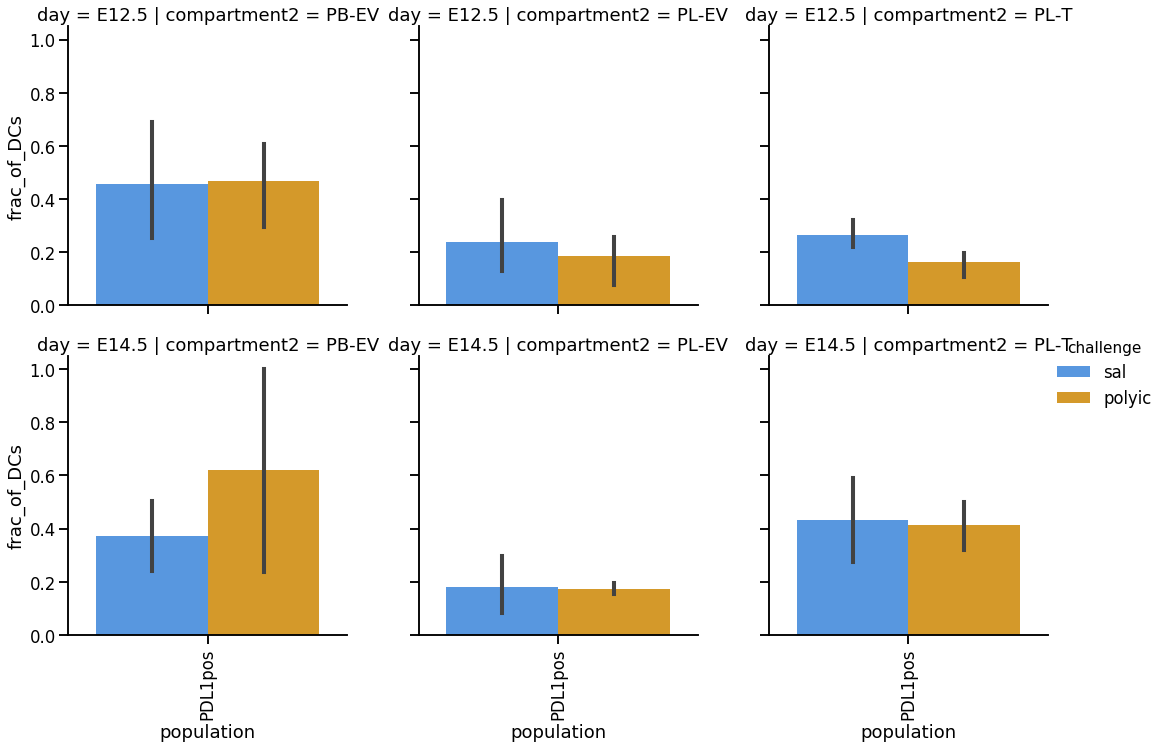

In [57]:
challenge_dict = {'sal': '#4295f5', 'polyic': '#f0a10e'}

df = PDL1_class_counts[PDL1_class_counts['timePI'].isin(['2hr']) & PDL1_class_counts['day'].isin(['E12.5', 'E14.5'])]
df.dropna(inplace = True)
sns.set_context('talk')
g = sns.catplot(x= 'population', row ='day', y='frac_of_DCs',
                hue='challenge', hue_order = ['sal', 'polyic'],
                col= 'compartment2',
                col_order = ['PB-EV', 'PL-EV', 'PL-T'], row_order = ['E12.5', 'E14.5'],
                palette = challenge_dict,
                data= df, 
                kind='bar', sharey = True, 
                height=5, aspect=1)
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat];

In [60]:
PDL1_medians['median'] = np.arcsinh(PDL1_medians['median']/5)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


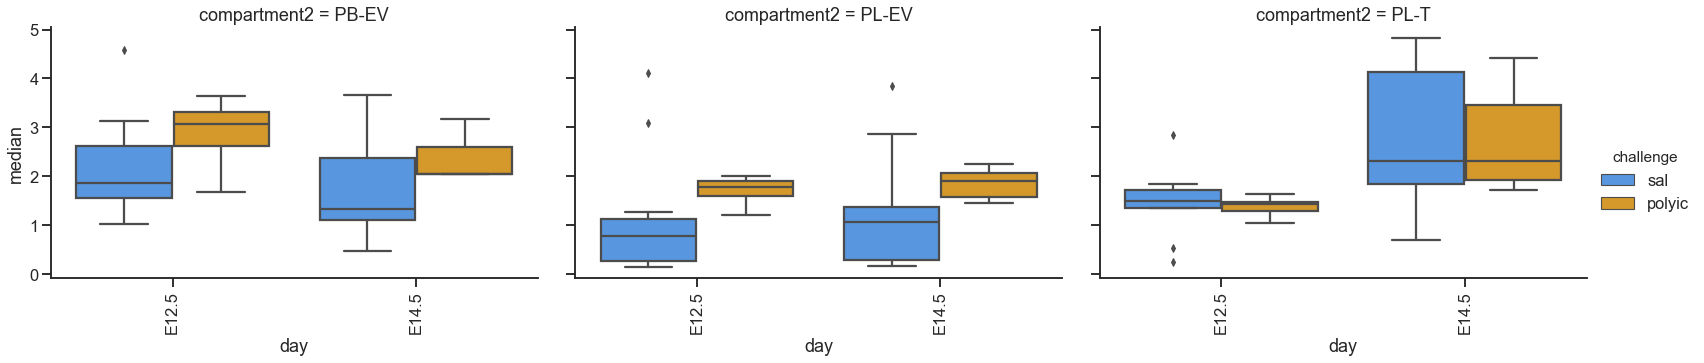

In [61]:
sns.set_style("ticks")
g = sns.catplot(x = 'day',order = ['E12.5', 'E14.5'], y = 'median', hue = 'challenge', col_order = ['PB-EV', 'PL-EV', 'PL-T'],
            hue_order = ['sal', 'polyic'], col = 'compartment2', 
            kind = 'box', sharey = True, 
            palette = challenge_dict, 
            ci = 68, 
            data=PDL1_medians[(PDL1_medians['reagent'] == 'PD-L1-bead4') 
                             & (PDL1_medians['timePI'] == '2hr')],
            legend_out = True, aspect = 1.5, height = 5)
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat];

In [62]:
subsample_path = '/Users/bendalllab/Desktop/Maternal_cells'
counts_path = os.path.join(subsample_path, 'CD68_pdl1_CellEngine.csv')
counts_df = pd.read_csv(counts_path)
counts_df.loc[:, ['cage', 'id','surgery_date']] = counts_df.loc[:, ['cage', 'id','surgery_date']].astype(str)

In [63]:
red_counts_df = counts_df.loc[:, ['filename','population', 'uniquePopulationName', 'cage', 'challenge', 'day', 'id', 'organ',
       'origin', 'surgery_date', 'timePI', 'reagent','median','eventCount']].set_index('filename')
locations = red_counts_df['uniquePopulationName'].str.split('>',n = 1, expand = True)
new_counts = pd.concat([red_counts_df, locations[0]], axis=1)
new_counts.drop(columns = ['uniquePopulationName'], inplace = True)
new_counts.rename(columns = {0: 'location'}, inplace = True)
new_counts['year'] = new_counts['surgery_date'].str.strip().str[-1]
year_dict = {'6': '2016','7': '2017', '8': '2018', '9': '2019'}
new_counts['batch_run'] = new_counts['year'].map(year_dict)
new_counts.drop(columns = 'year', inplace = True)
PB_mask = (new_counts['batch_run'].isin(['2016', '2017']) & (new_counts['organ'] == 'PB'))
new_counts['location'][PB_mask] = 'EV'
PL_mask = (new_counts['batch_run'].isin(['2016', '2017']) & new_counts['organ'].isin(['PL_M', 'PL_F', 'PL', 'PL_U', 'decidua']))
new_counts['location'][PL_mask] = 'whole'
new_counts['compartment'] = new_counts['organ'].str.cat(new_counts['location'], sep= '-')
comp_dict = {'PB-EV': 'PB-EV', 
'PL_M-EV ': 'PL-EV', 
'PL_M-TIS ': 'PL-T', 
'PL_F-EV ': 'PL-EV', 
'PL_F-TIS ': 'PL-T',
'PL-EV ': 'PL-EV', 
'PL-TIS ': 'PL-T', 
'PL_M-whole': 'PL-whole', 
'PL_F-whole': 'PL-whole', 
'PB-EV ': 'PB-EV',
'PB-TIS ': 'PB-T',
'decidua-EV ':'decidua-EV',
'decidua-TIS ': 'decidua-T',
'PL_U-EV ': 'PL-EV',
'PL_U-TIS ': 'PL-T'}
new_counts['compartment2']= new_counts['compartment'].map(comp_dict)
new_counts_clean = new_counts[new_counts['compartment2'].isin(['PB-EV', 'PL-EV', 'PL-T', 'decidua-EV', 'decidua-T', 'PL-whole'])]

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.

In [64]:
new_counts_clean.head(5)

,population,cage,challenge,day,id,organ,origin,surgery_date,timePI,reagent,median,eventCount,location,batch_run,compartment,compartment2
filename,,,,,,,,,,,,,,,,
_102816 Cage 3576 15 E12.5 PB p4 24hr sal_PB_TER119Neg_batchnorm.fcs,CD68_pos,3576,sal,E12.5,15,PB,maternal,_102816,24hr,PD-L1-bead4,8.147859,NaN,EV,2016,PB-EV,PB-EV
_102816 Cage 3576 15 E12.5 PB p4 24hr sal_PB_TER119Neg_batchnorm.fcs,CD68_pos,3576,sal,E12.5,15,PB,maternal,_102816,24hr,PD-L1-bead4,NaN,NaN,EV,2016,PB-EV,PB-EV
_102816 Cage 3576 15 E12.5 PB p4 24hr sal_PB_TER119Neg_batchnorm.fcs,Ly6Chi,3576,sal,E12.5,15,PB,maternal,_102816,24hr,PD-L1-bead4,NaN,NaN,EV,2016,PB-EV,PB-EV
_102816 Cage 3576 15 E12.5 PB p4 24hr sal_PB_TER119Neg_batchnorm.fcs,Ly6Clo,3576,sal,E12.5,15,PB,maternal,_102816,24hr,PD-L1-bead4,NaN,NaN,EV,2016,PB-EV,PB-EV
_102816 Cage 3576 15 E12.5 PB p4 24hr sal_PB_TER119Neg_batchnorm.fcs,Ly6Cmid,3576,sal,E12.5,15,PB,maternal,_102816,24hr,PD-L1-bead4,8.147859,NaN,EV,2016,PB-EV,PB-EV


In [66]:
PDL1_medians = new_counts_clean.drop(columns = 'eventCount')

In [68]:
PDL1_medians['median'] = np.arcsinh(PDL1_medians['median']/5)

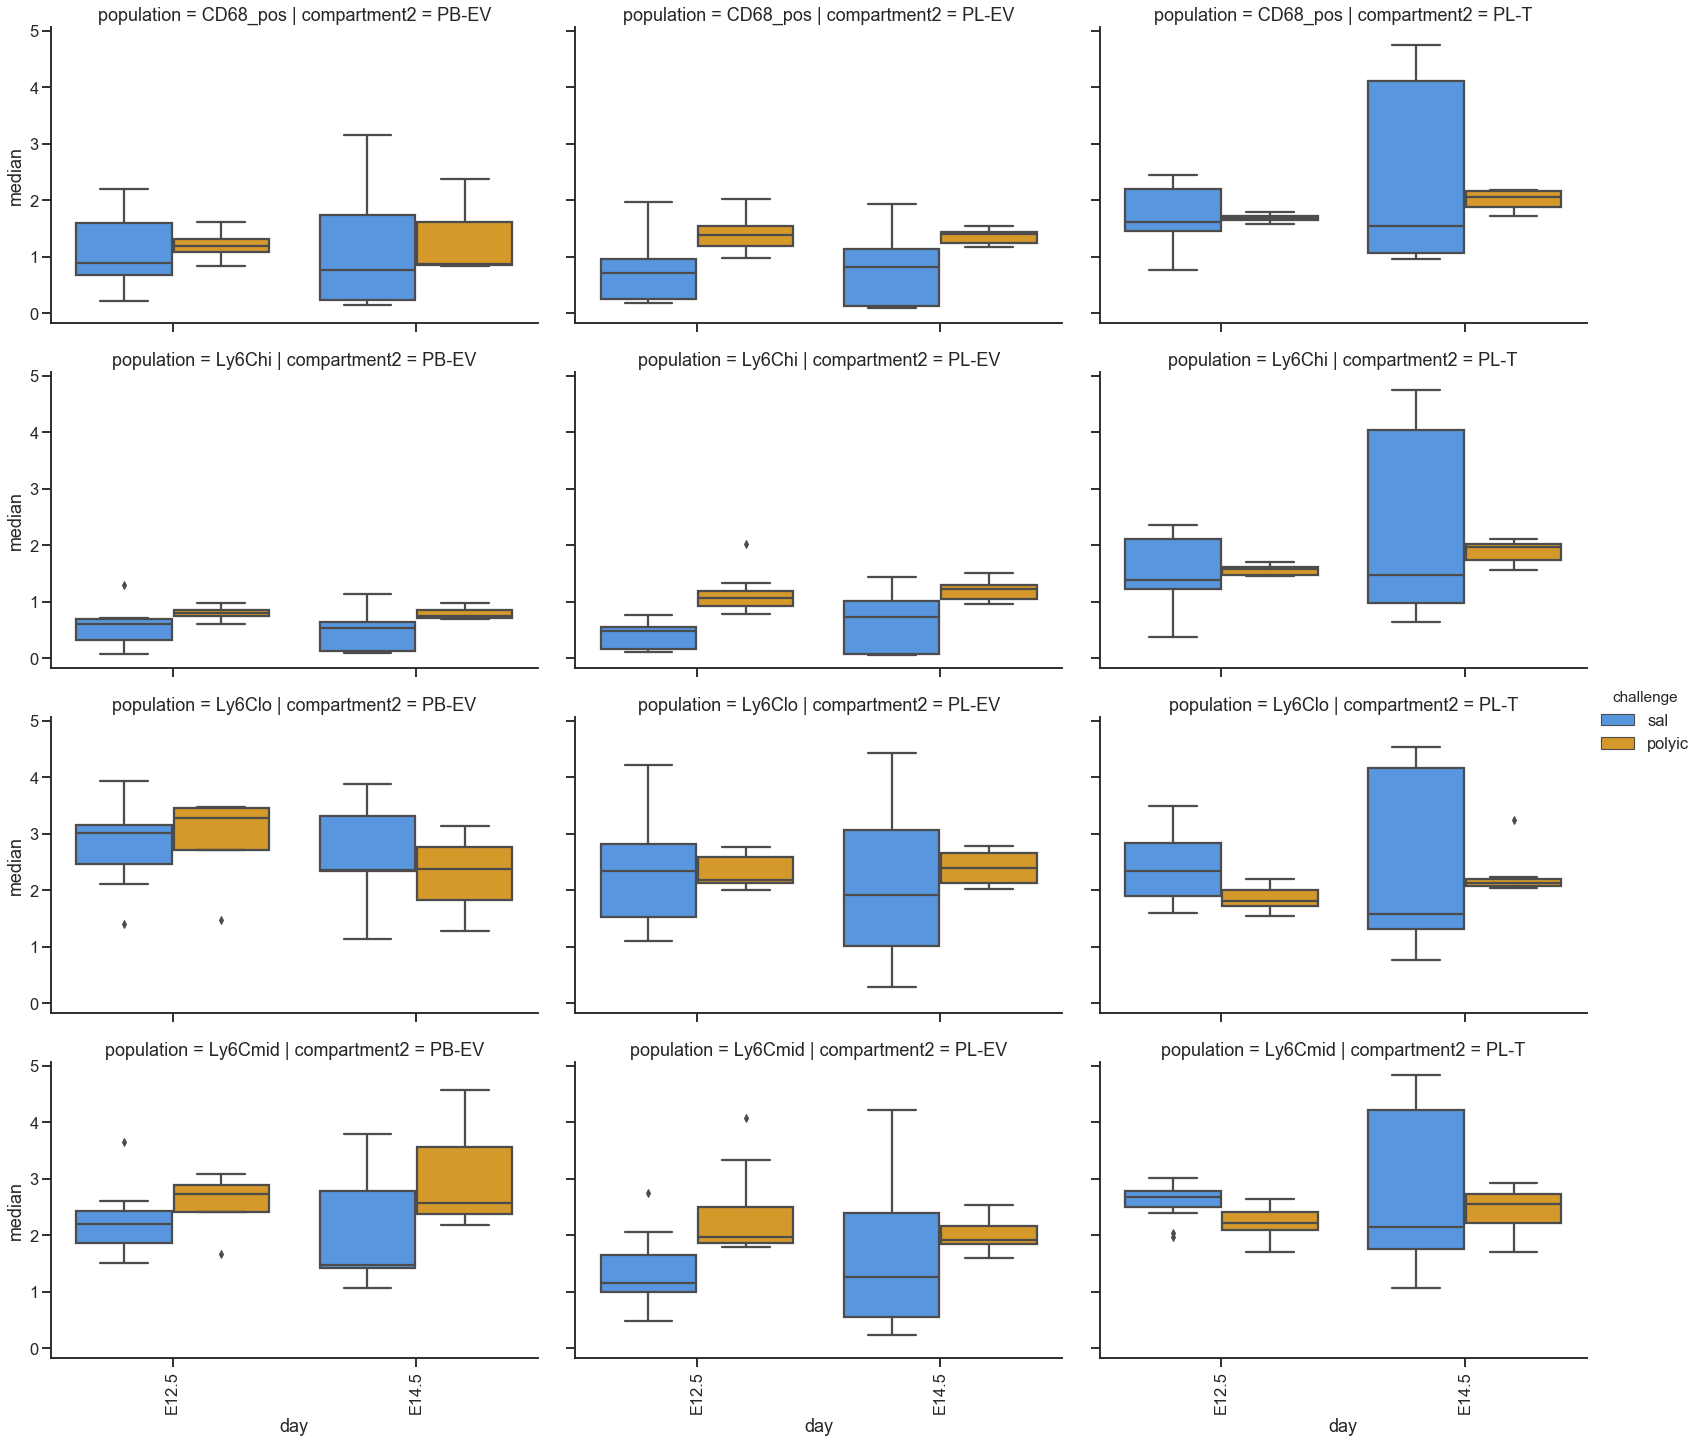

In [70]:
sns.set_style("ticks")
g = sns.catplot(x = 'day',order = ['E12.5', 'E14.5'], y = 'median', hue = 'challenge', col_order = ['PB-EV', 'PL-EV', 'PL-T'],
            hue_order = ['sal', 'polyic'], col = 'compartment2', 
            kind = 'box', sharey = True, row = 'population',
            palette = challenge_dict, 
            ci = 68, 
            data=PDL1_medians[(PDL1_medians['reagent'] == 'PD-L1-bead4') 
                             & (PDL1_medians['timePI'] == '2hr')],
            legend_out = True, aspect = 1.5, height = 5)
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat];

In [71]:
subsample_path = '/Users/bendalllab/Desktop/Maternal_cells'
counts_path = os.path.join(subsample_path, 'Neutrophils_PDL1_CellEngine.csv')
counts_df = pd.read_csv(counts_path)
counts_df.loc[:, ['cage', 'id','surgery_date']] = counts_df.loc[:, ['cage', 'id','surgery_date']].astype(str)
red_counts_df = counts_df.loc[:, ['filename','population', 'uniquePopulationName', 'cage', 'challenge', 'day', 'id', 'organ',
       'origin', 'surgery_date', 'timePI', 'reagent','median','eventCount']].set_index('filename')
locations = red_counts_df['uniquePopulationName'].str.split('>',n = 1, expand = True)
new_counts = pd.concat([red_counts_df, locations[0]], axis=1)
new_counts.drop(columns = ['uniquePopulationName'], inplace = True)
new_counts.rename(columns = {0: 'location'}, inplace = True)
new_counts['year'] = new_counts['surgery_date'].str.strip().str[-1]
year_dict = {'6': '2016','7': '2017', '8': '2018', '9': '2019'}
new_counts['batch_run'] = new_counts['year'].map(year_dict)
new_counts.drop(columns = 'year', inplace = True)
PB_mask = (new_counts['batch_run'].isin(['2016', '2017']) & (new_counts['organ'] == 'PB'))
new_counts['location'][PB_mask] = 'EV'
PL_mask = (new_counts['batch_run'].isin(['2016', '2017']) & new_counts['organ'].isin(['PL_M', 'PL_F', 'PL', 'PL_U', 'decidua']))
new_counts['location'][PL_mask] = 'whole'
new_counts['compartment'] = new_counts['organ'].str.cat(new_counts['location'], sep= '-')
comp_dict = {'PB-EV': 'PB-EV', 
'PL_M-EV ': 'PL-EV', 
'PL_M-TIS ': 'PL-T', 
'PL_F-EV ': 'PL-EV', 
'PL_F-TIS ': 'PL-T',
'PL-EV ': 'PL-EV', 
'PL-TIS ': 'PL-T', 
'PL_M-whole': 'PL-whole', 
'PL_F-whole': 'PL-whole', 
'PB-EV ': 'PB-EV',
'PB-TIS ': 'PB-T',
'decidua-EV ':'decidua-EV',
'decidua-TIS ': 'decidua-T',
'PL_U-EV ': 'PL-EV',
'PL_U-TIS ': 'PL-T'}
new_counts['compartment2']= new_counts['compartment'].map(comp_dict)
new_counts_clean = new_counts[new_counts['compartment2'].isin(['PB-EV', 'PL-EV', 'PL-T', 'decidua-EV', 'decidua-T', 'PL-whole'])]

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [72]:
new_counts_clean.head(5)

,population,cage,challenge,day,id,organ,origin,surgery_date,timePI,reagent,median,eventCount,location,batch_run,compartment,compartment2
filename,,,,,,,,,,,,,,,,
_102816 Cage 3576 15 E12.5 PB p4 24hr sal_PB_TER119Neg_batchnorm.fcs,Neutrophils,3576,sal,E12.5,15,PB,maternal,_102816,24hr,PD-L1-bead4,NaN,NaN,EV,2016,PB-EV,PB-EV
_102816 Cage 3576 15 E12.5 PB p4 24hr sal_PB_TER119Neg_batchnorm.fcs,PDL1 Neu,3576,sal,E12.5,15,PB,maternal,_102816,24hr,PD-L1-bead4,NaN,NaN,EV,2016,PB-EV,PB-EV
_102816 Cage 3576 15 E12.5 PB p4 24hr sal_PB_TER119Neg_batchnorm.fcs,Neutrophils,3576,sal,E12.5,15,PB,maternal,_102816,24hr,PD-L1-bead4,NaN,NaN,EV,2016,PB-EV,PB-EV
_102816 Cage 3576 15 E12.5 PB p4 24hr sal_PB_TER119Neg_batchnorm.fcs,PDL1 Neu,3576,sal,E12.5,15,PB,maternal,_102816,24hr,PD-L1-bead4,NaN,NaN,EV,2016,PB-EV,PB-EV
_82318 Cage 0428 14 E12.5 PL_M p1 2hr sal_Not fetal_batchnorm.fcs,Neutrophils,428,sal,E12.5,14,PL_M,maternal,_82318,2hr,PD-L1-bead4,0.27452,NaN,EV,2018,PL_M-EV,PL-EV


In [73]:
PDL1_medians = new_counts_clean.drop(columns = 'eventCount')
PDL1_medians['median'] = np.arcsinh(PDL1_medians['median']/5)

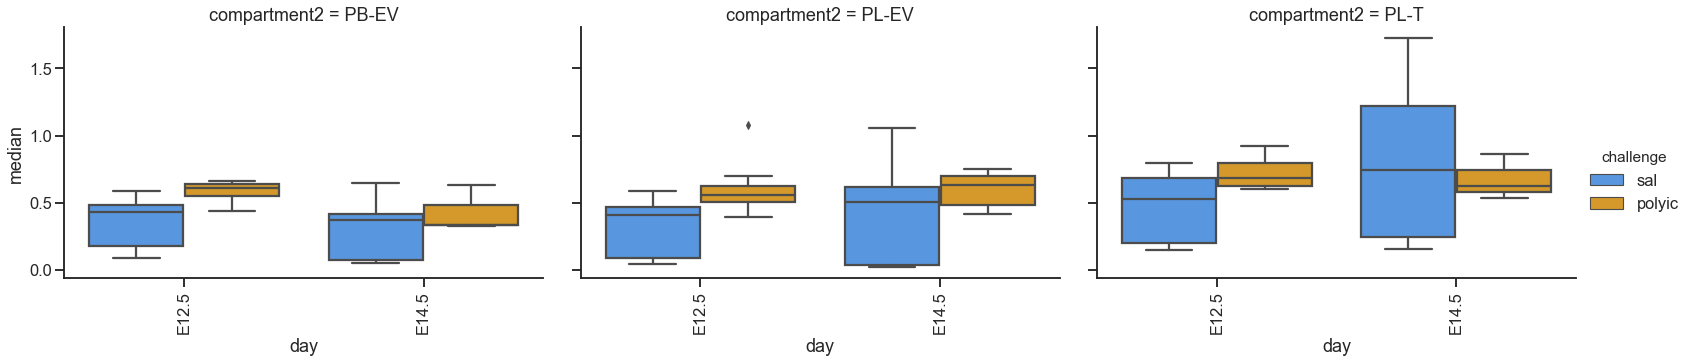

In [75]:
sns.set_style("ticks")
g = sns.catplot(x = 'day',order = ['E12.5', 'E14.5'], y = 'median', hue = 'challenge', col_order = ['PB-EV', 'PL-EV', 'PL-T'],
            hue_order = ['sal', 'polyic'], col = 'compartment2', 
            kind = 'box', sharey = True,
            palette = challenge_dict, 
            ci = 68, 
            data=PDL1_medians[(PDL1_medians['reagent'] == 'PD-L1-bead4') &
                             (PDL1_medians['timePI'] == '2hr') &
                             (PDL1_medians['population'] == 'Neutrophils')],
            legend_out = True, aspect = 1.5, height = 5)
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat];